<h1 style="text-align: center;">Iris Data Set | Non Binary Classification</h1>
<h4 style="text-align: center;">Ghani Haider |  github.com/Ghani-Haider/</h4>

The [dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is classic Iris Data Set. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. The goal is to understand trends in the data and perform non binary classification with Logistic Regression.

The dataset consist of following features/ attributes:
- sepal_length
- sepal_width
- petal_length
- petal_width
- species (target): (setosa, versicolor, virginica)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# statistical summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# target variable values
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Above values indicate that target variable has no class imbalance.

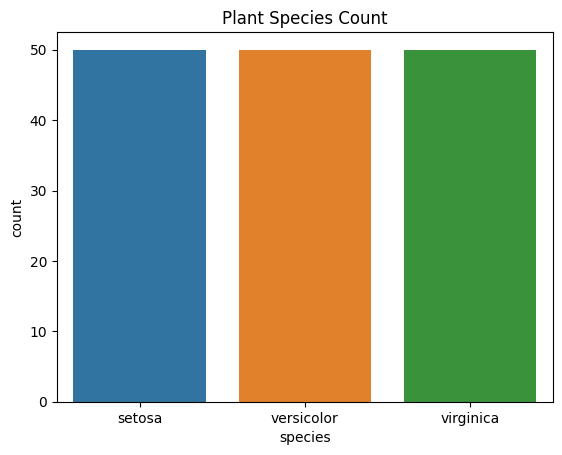

In [17]:
# plot target variable's class count
sns.countplot(x=df['species'])
plt.title('Plant Species Count')
plt.show()

### Relationship of Iris's flower features with each other.

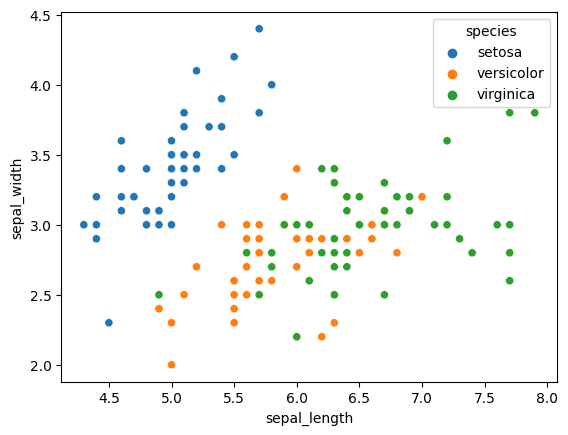

In [19]:
# sepal width and length relationship with respect to species
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')
plt.show()

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

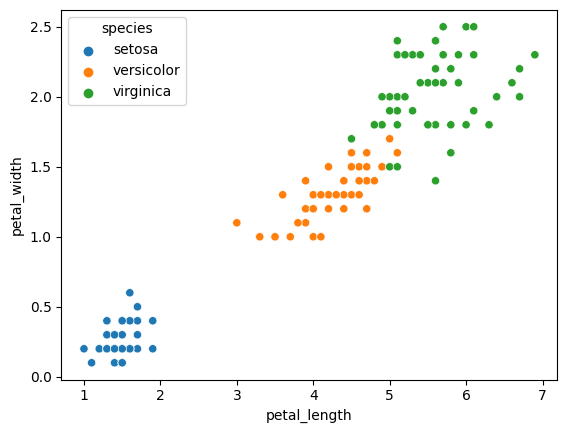

In [20]:
# petal width and length relationship with respect to species
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

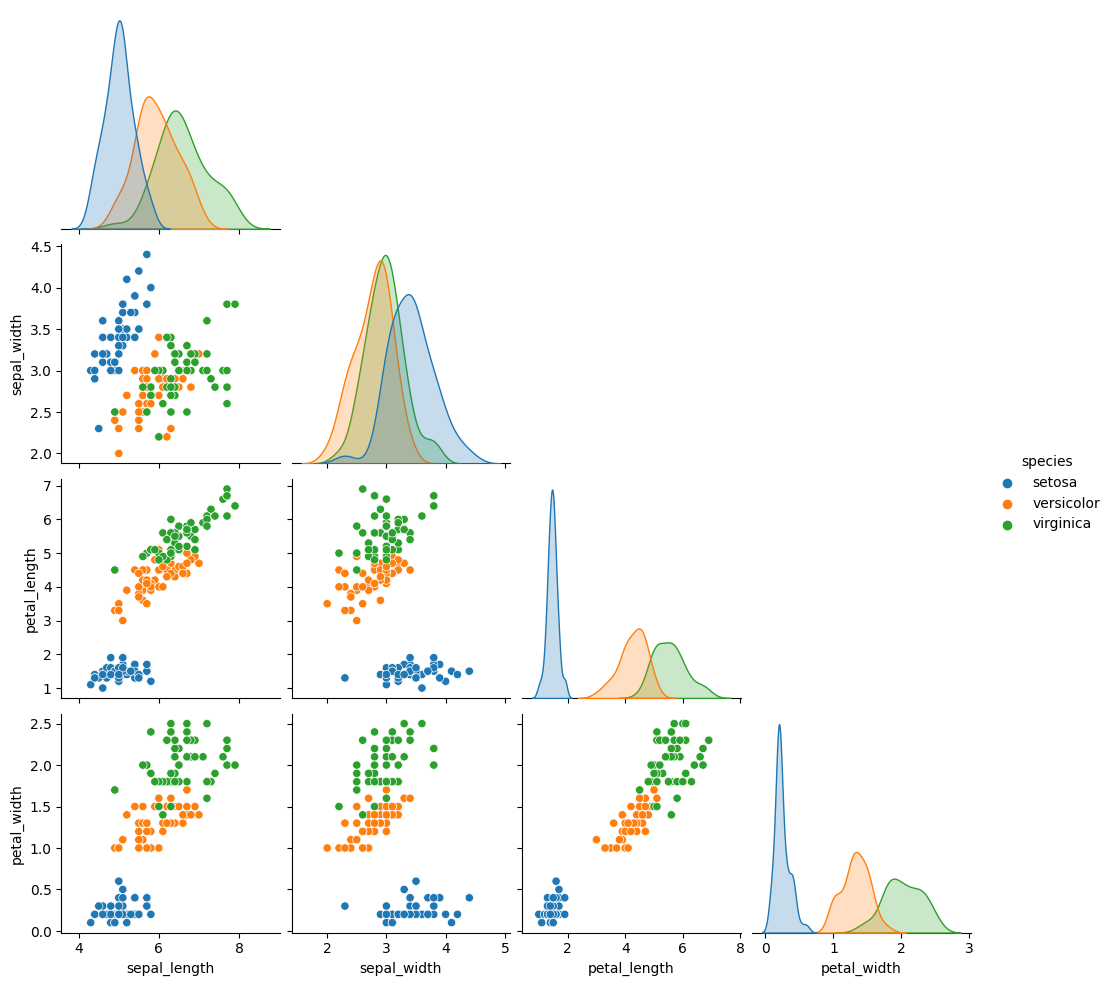

In [22]:
# plot feature relationships
sns.pairplot(df,hue='species', corner=True, diag_kind='kde')
plt.show()

### Feature Correlation

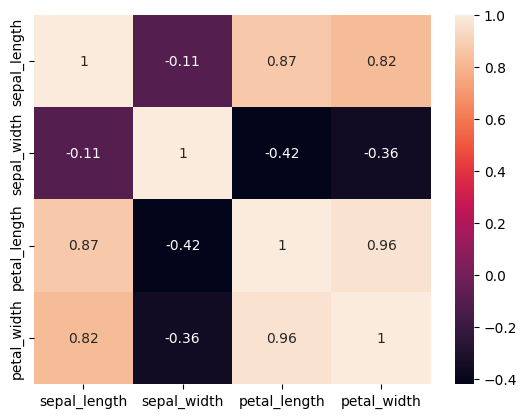

In [24]:
# feature correlation heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### 3d plot of the given dataset

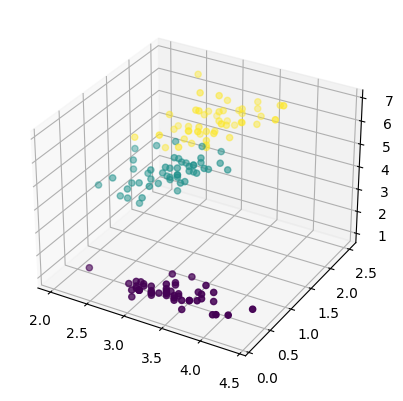

In [25]:
# 3d plot of given dataset
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

## Creating Classification Model

### Train Test Split and Scaling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# feature and target separation
X = df.drop('species',axis=1)
y = df['species']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# scaling features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Multi-Class Logistic Regression Model

Since the target variable is multi-variate, using multi-class logistic regression model and cross-validation to find a well-performing C value for the hyper-parameter search.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

# main parameter choices are regularization penalty choice and regularization C value.
penalty = ['l1', 'l2'] # penalty type
C = np.logspace(0, 4, 10) # logarithmically spaced C values (recommended in official docs)

# grid search model
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

# train
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [30]:
grid_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l1'}

### Model Performance on Classification Tasks

******************************
Confusion Matrix:
[[6 0 0]
 [0 3 0]
 [0 0 6]]
******************************
Classification Accuracy: 1.0
******************************
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         3
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

******************************
Confusion Matrix Plot:


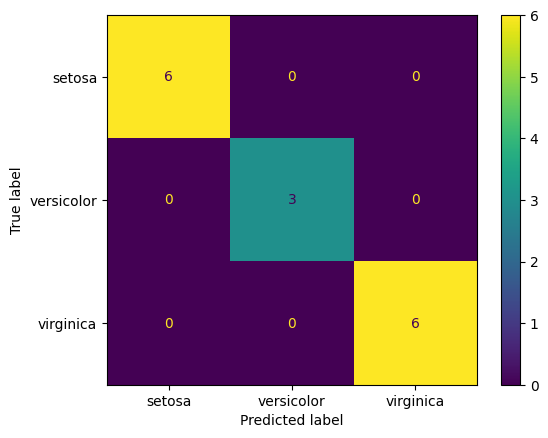

In [44]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# predict test set
y_pred = grid_model.predict(scaled_X_test)

# confusion matrix of test set
print(f"{'*'*30}\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n{'*'*30}")

# model accuracy
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}\n{'*'*30}")

# model classfication report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n{'*'*30}")

# plot confusion matrix
print(f"Confusion Matrix Plot:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Evaluating ROC Curves and AUC

Created a function for creating and plotting an ROC per class.

In [45]:
from sklearn.metrics import roc_curve, auc

# function to plot roc and auc per class
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

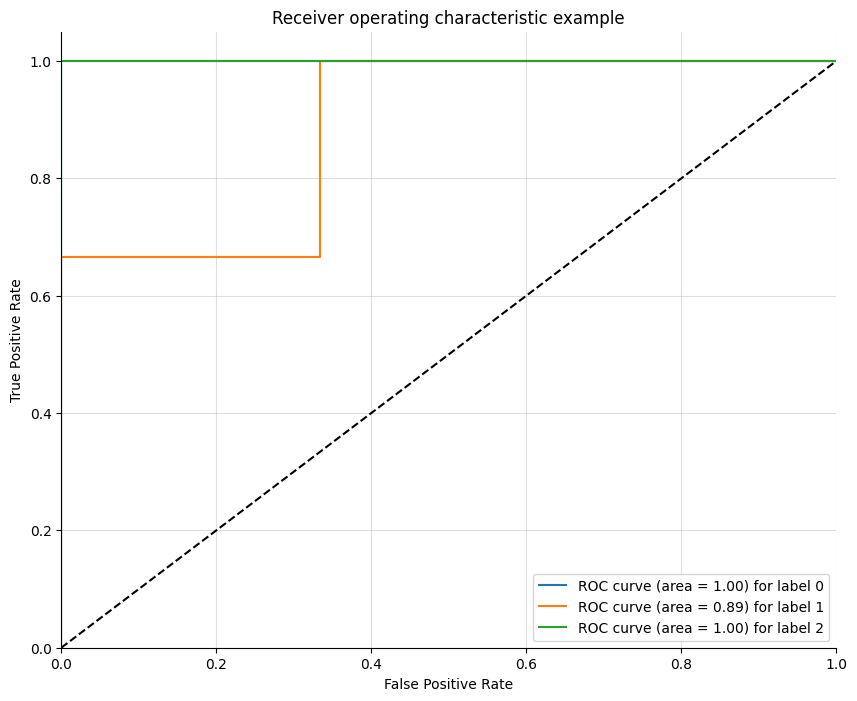

In [48]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(10, 8))